Author: Geoff Boeing <br />
Web: http://geoffboeing.com  <br />
Date: 2015-03-25 <br />
Description: This notebook implements a logistic difference model and plots its results, bifurcation diagrams, and poincare plots

In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
def logistic_model(generations=20, 
                   growth_rate_min=0.5, 
                   growth_rate_max=4, 
                   growth_rate_steps=7, 
                   pop_initial=0.5):
    """
    returns a pandas dataframe with columns for each growth rate, row labels for each time step,
    and population values computed by the logistic model: pop[t + 1] = pop[t] * rate * (1 - pop[t])
    
    pop_initial = starting population when you run the model, between 0 and 1
    generations = number of iterations to run the model
    growth_rate_min = the first growth rate for the model, between 0 and 4
    growth_rate_max = the last growth rate for the model, between 0 and 4
    growth_rate_steps = how many growth rates between min and max (inclusive) to run the model on
    """
    
    # convert the growth rate min and max values to floats so we can divide them
    growth_rate_min = float(growth_rate_min)
    growth_rate_max = float(growth_rate_max)
    
    # calculate the size of each step
    growth_rate_step = (growth_rate_max - growth_rate_min) / growth_rate_steps
    
    # we want to go up to but not including the growth_rate_max
    growth_rate_max -= 0.0000000001
    
    # get a range of values to represent each growth rate we're modeling - these will be our columns
    growth_rates = np.arange(growth_rate_min, growth_rate_max, growth_rate_step)
    
    # create a new dataframe with one column for each growth rate and one row for each timestep (aka generation)
    pops = pd.DataFrame(columns=growth_rates, index=range(generations))
    pops.iloc[0] = pop_initial
    
    # for each column (aka growth rate) in the dataframe
    for rate in pops.columns:
        
        # pop is a copy of the pandas series of this column in the dataframe
        pop = pops[rate]
        
        # for each timestep in the number of iterations to run
        for t in range(generations - 1):
            
            # update the dataframe values by running this timestep of the logistic model
            pop[t + 1] = pop[t] * rate * (1 - pop[t])
    
    return pops

In [3]:
def get_bifurcation_points(pops):
    """
    convert a dataframe of values from the logistic model into a set of xy points that
    you can plot as a bifurcation diagram
    """
    
    # create a new dataframe to contain our xy points
    points = pd.DataFrame(columns=['x', 'y'])
    
    # drop the first row of the logistic populations data because it's the same starting value for all growth rates
    pops = pops.drop(labels=pops.index[0])
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        # append the growth rate as the x column and all the population values as the y column
        points = points.append(pd.DataFrame({'x':rate, 'y':pops[rate]}))
    
    # reset the index and drop the old index before returning the xy point data
    points = points.reset_index().drop(labels='index', axis=1)
    return points

In [4]:
def bifurcation_plot(pops, xmin=0, xmax=4, ymin=0, ymax=1, height=6, width=10):
    """
    plot the results of the logistic model as a bifurcation diagram
    """
    
    # first get the xy points to plot
    points = get_bifurcation_points(pops)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    
    # plot the xy data
    bifurcation_scatter = ax.scatter(points['x'], points['y'], c='b', edgecolor='', alpha=1, s=1)
    
    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title('Bifurcation Diagram')
    ax.set_xlabel('Growth Rate')
    ax.set_ylabel('Population')
    
    plt.show()

In [5]:
def get_poincare_points(pops):
    """
    convert a dataframe of values from the logistic model into a set of xy points that
    you can plot as a poincare diagram
    """
    
    # drop the first row because every run has the same starting value
    pops = pops.drop(pops.index[0])
    li = []
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        
        # for each row in the column
        for label, row in pops.iterrows():
            
            # if this is not the last row in the column
            if label < len(pops)-1:
                
                # append the value at the current time (aka row) as the x and the value at t+1 as the y
                li.append((row[rate], pops[rate][label + 1]))
    
    # convert the xy list of values to a dataframe and return
    return pd.DataFrame(li, columns=['x', 'y'])

In [6]:
def poincare_plot(pops, xmin=0, xmax=1, ymin=0, ymax=1):
    """
    plot the results of the logistic model as a poincaré plot
    """
    
    # first get the xy points to plot
    points = get_poincare_points(pops)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    # plot the xy data
    poincare_scatter = ax.scatter(points['x'], points['y'], c='r', edgecolor='', alpha=1, s=1)

    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(u'Poincaré Plot')
    ax.set_xlabel('t')
    ax.set_ylabel('t + 1')

    plt.show()

In [7]:
# run the logistic map with its default parameters and view the data output
pops = logistic_model()
pops

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.125,0.25,0.375,0.5,0.625,0.75,0.875
2,0.0546875,0.1875,0.3515625,0.5,0.5859375,0.5625,0.3828125
3,0.02584839,0.1523438,0.3419495,0.5,0.6065369,0.7382812,0.8269348
4,0.01259012,0.1291351,0.33753,0.5,0.5966247,0.5796661,0.5008977
5,0.006215807,0.1124592,0.3354053,0.5,0.6016591,0.7309599,0.8749972
6,0.003088585,0.09981217,0.3343629,0.5,0.5991635,0.5899725,0.3828199
7,0.001539523,0.0898497,0.3338465,0.5,0.6004165,0.7257148,0.8269409
8,0.0007685764,0.08177673,0.3335895,0.5,0.5997913,0.5971585,0.5008838
9,0.0003839928,0.0750893,0.3334613,0.5,0.6001042,0.7216807,0.8749973


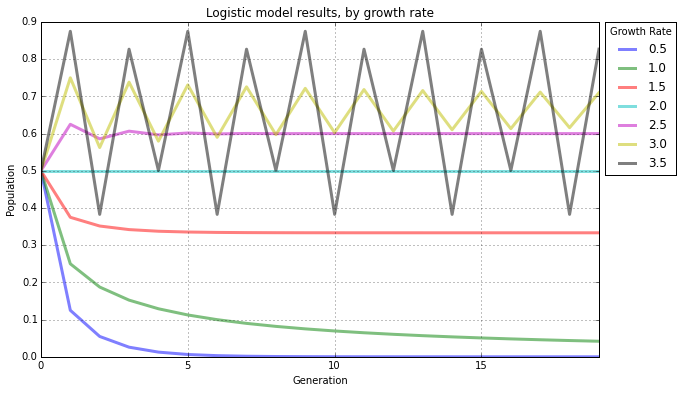

In [8]:
# plot the results of the logistic map run for these 7 different growth rates
pops = logistic_model()
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.5)
ax.set_title('Logistic model results, by growth rate')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))
plt.show()

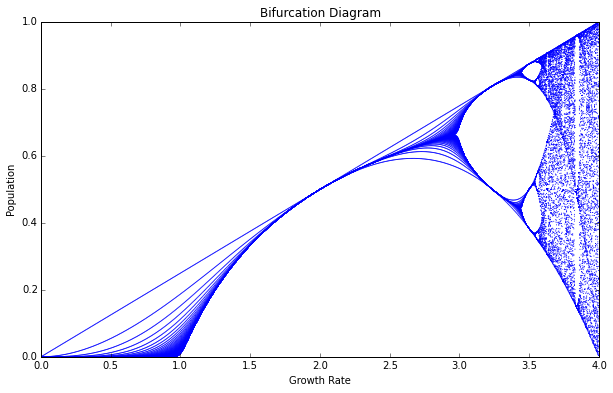

In [9]:
# run the model for 100 generations across 1000 growth rate steps from 0 to 4, and plot the bifurcation diagram
generations = 100
growth_rate_min = 0
growth_rate_max = 4
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, growth_rate_min, growth_rate_max)

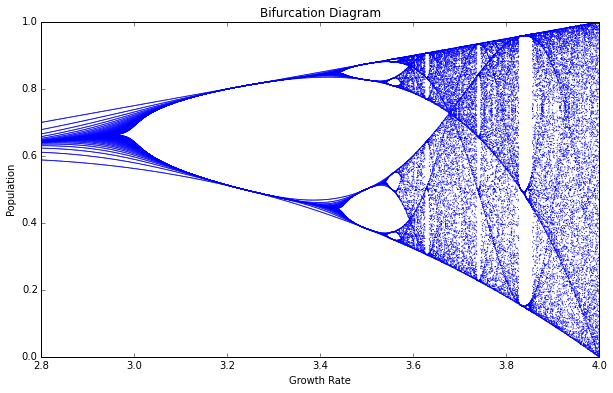

In [10]:
# run the model for 100 generations across 1000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
generations = 100
growth_rate_min = 2.8
growth_rate_max = 4
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, growth_rate_min, growth_rate_max)

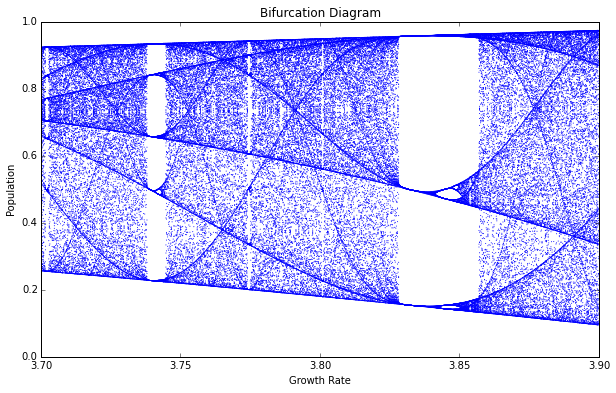

In [11]:
# run the model for 100 generations across 1000 growth rate steps from 3.7 to 3.9, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows more detail in the chaotic regimes
generations = 100
growth_rate_min = 3.7
growth_rate_max = 3.9
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, growth_rate_min, growth_rate_max)

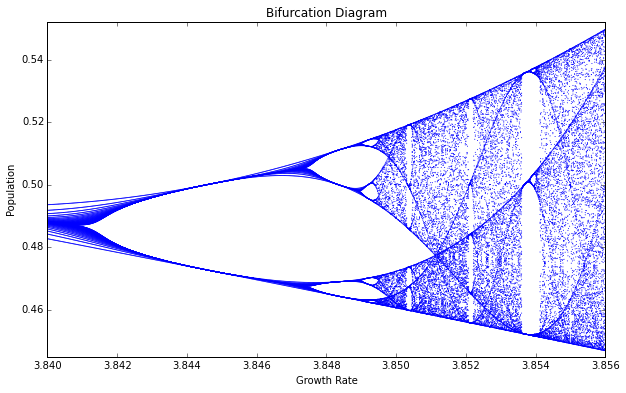

In [12]:
# run the model for 200 generations across 1000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
generations = 200
growth_rate_min = 3.84
growth_rate_max = 3.856
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, growth_rate_min, growth_rate_max, 0.445, 0.552)

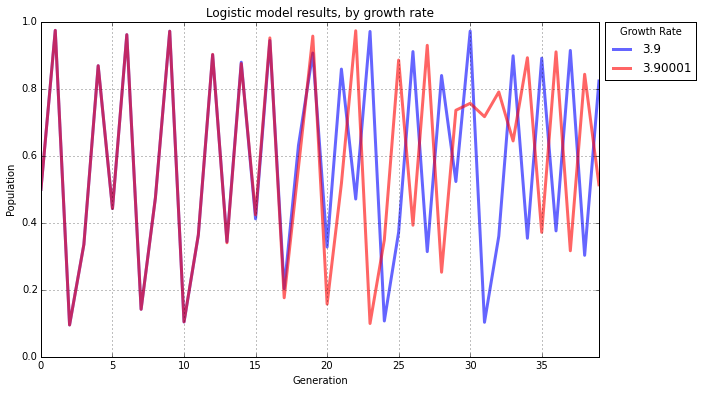

In [13]:
# plot the results of the logistic model for growth rates of 3.9 and 3.90001 to see how they diverge through chaos
generations = 40
growth_rate_min = 3.9
growth_rate_max = growth_rate_min + 0.00002
growth_rate_steps = 2
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
ax.set_color_cycle(['c', 'm'])
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['b-','r-'])
ax.set_title('Logistic model results, by growth rate')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.81))
plt.show()

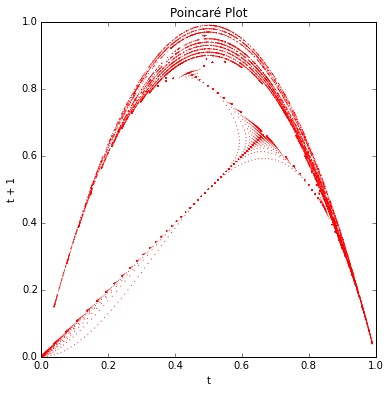

In [14]:
# draw a poincare plot for 1000 generations across 100 growth rate steps from 0 to 4
generations = 1000
growth_rate_min = 0
growth_rate_max = 4
growth_rate_steps = 100
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops)

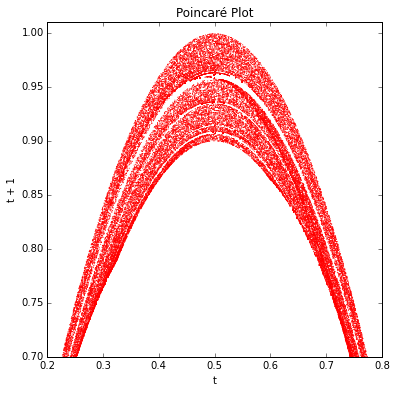

In [15]:
# draw a poincare plot for 1000 generations across 100 growth rate steps from 3.6 to 4
generations = 1000
growth_rate_min = 3.6
growth_rate_max = 4
growth_rate_steps = 100
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, xmin=0.2, xmax=0.8, ymin=0.7, ymax=1.01)

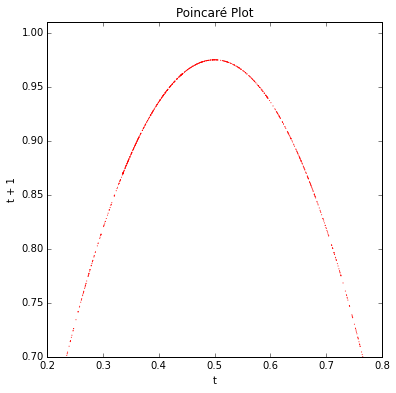

In [16]:
# draw a poincare plot for 2000 generations for 1 growth rate: 3.9
generations = 2000
growth_rate_min = 3.9
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, xmin=0.2, xmax=0.8, ymin=0.7, ymax=1.01)